In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv(r"D:\download from chrome\Datasets\Aemf1.csv")

pd.set_option('display.max.columns',30)
pd.set_option('display.max.rows',30)

In [4]:
df.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  bool   
 5   Private Room                 41714 non-null  bool   
 6   Person Capacity              41714 non-null  float64
 7   Superhost                    41714 non-null  bool   
 8   Multiple Rooms               41714 non-null  int64  
 9   Business                     41714 non-null  int64  
 10  Cleanliness Rating           41714 non-null  float64
 11  Guest Satisfaction           41714 non-null  float64
 12  Bedrooms                     41714 non-null  int64  
 13  City Center (km)

In [6]:
df.isnull().sum()

City                           0
Price                          0
Day                            0
Room Type                      0
Shared Room                    0
Private Room                   0
Person Capacity                0
Superhost                      0
Multiple Rooms                 0
Business                       0
Cleanliness Rating             0
Guest Satisfaction             0
Bedrooms                       0
City Center (km)               0
Metro Distance (km)            0
Attraction Index               0
Normalised Attraction Index    0
Restraunt Index                0
Normalised Restraunt Index     0
dtype: int64

In [7]:
df.describe()

,Price,Person Capacity,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
count,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000
mean,260.094423,3.237235,0.295273,0.341180,9.442274,93.103179,1.165939,2.679792,0.603921,293.905990,11.719658,626.692618,25.553590
std,279.408493,1.299459,0.456171,0.474112,0.889173,8.141745,0.638157,1.996684,0.706206,235.750055,8.379161,520.644720,18.484572
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757
25%,144.016085,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.275913,0.236693,124.371614,5.510735,210.459574,11.132052
50%,203.819274,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.253237,0.391220,228.920599,9.951086,519.583509,21.814414
75%,297.373358,4.000000,1.000000,1.000000,10.000000,98.000000,1.000000,3.584489,0.678702,394.000201,15.467009,860.708156,36.821356
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000


In [8]:
# cleaning

df['Room Type'] = df['Room Type'].str.replace(' ','')

df['Entirehome'] = df['Room Type'] == 'Entirehome/apt'

col = 'Entirehome'
cols = list(df.columns)
cols.insert(6, cols.pop(cols.index(col)))
df = df[cols]

df

,City,Price,Day,Room Type,Shared Room,Private Room,Entirehome,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Privateroom,False,True,False,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Privateroom,False,True,False,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Privateroom,False,True,False,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Privateroom,False,True,False,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Privateroom,False,True,False,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,Vienna,715.938574,Weekend,Entirehome/apt,False,False,True,6.0,False,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584
41710,Vienna,304.793960,Weekend,Entirehome/apt,False,False,True,2.0,False,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427
41711,Vienna,637.168969,Weekend,Entirehome/apt,False,False,True,2.0,False,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996
41712,Vienna,301.054157,Weekend,Privateroom,False,True,False,2.0,False,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416


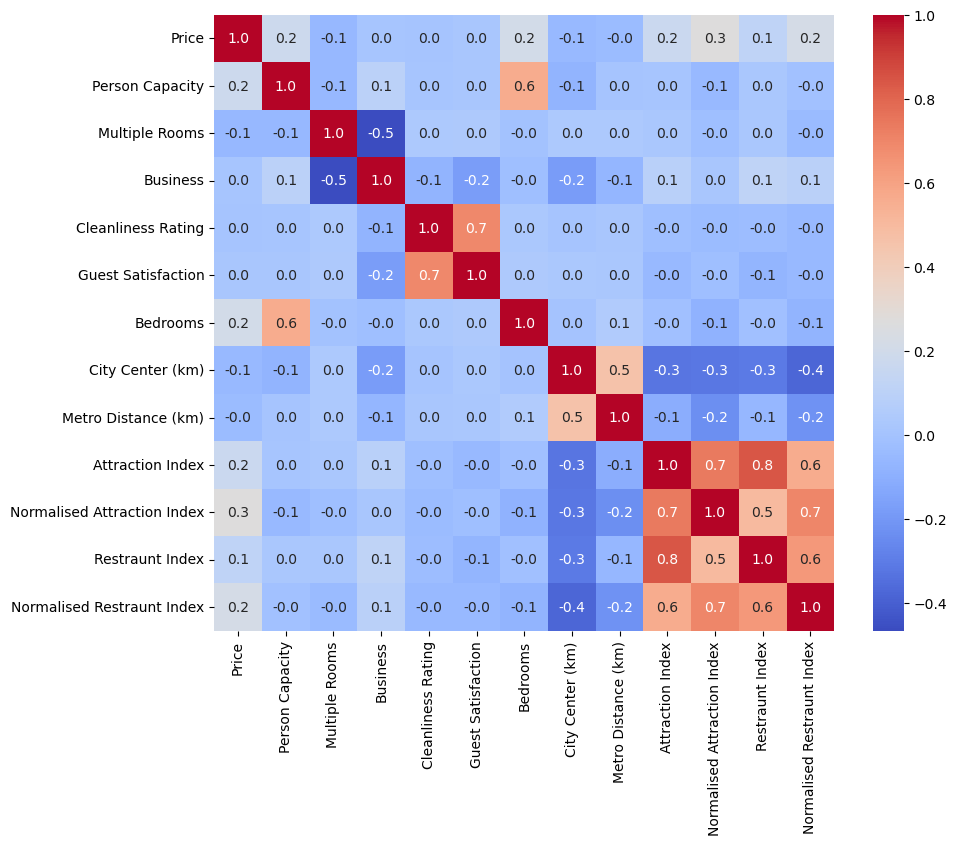

In [9]:
# EDA

plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,fmt='.1f',cmap='coolwarm')
plt.show()

<Axes: ylabel='City'>

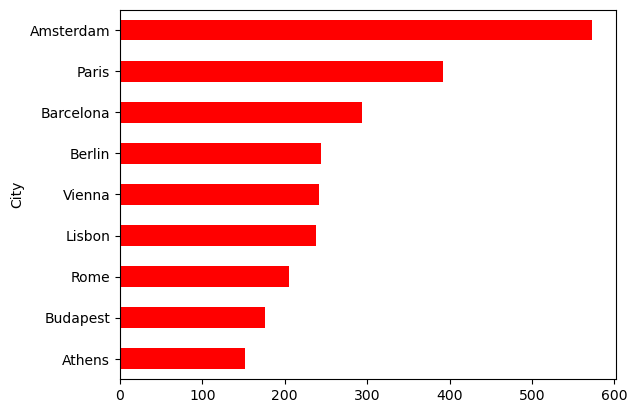

In [10]:
df.groupby('City')['Price'].mean().sort_values().plot(kind='barh',color='red')

<Axes: ylabel='City'>

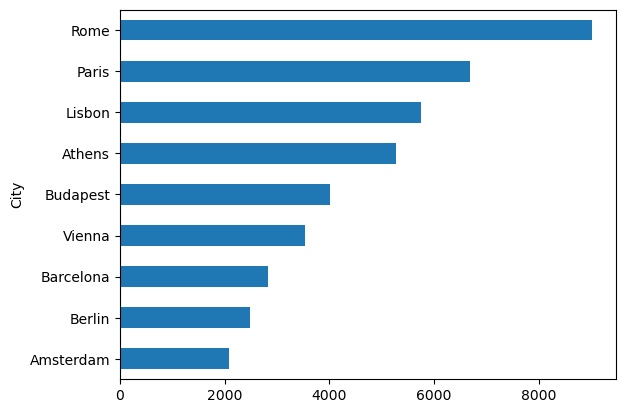

In [11]:
df['City'].value_counts().sort_values().plot(kind='barh')

In [12]:
df['Room Type'].value_counts()

Room Type
Entirehome/apt    28264
Privateroom       13134
Sharedroom          316
Name: count, dtype: int64

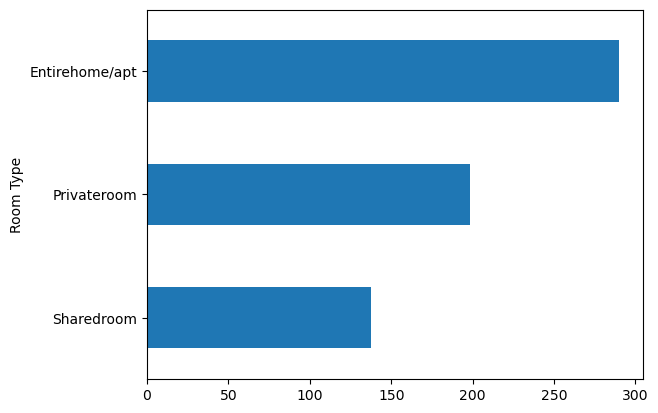

In [13]:
df.groupby('Room Type')['Price'].mean().sort_values().plot(kind='barh')
plt.show()

Room Type
Entirehome/apt    93.433697
Privateroom       92.470687
Sharedroom        89.829114
Name: Guest Satisfaction, dtype: float64

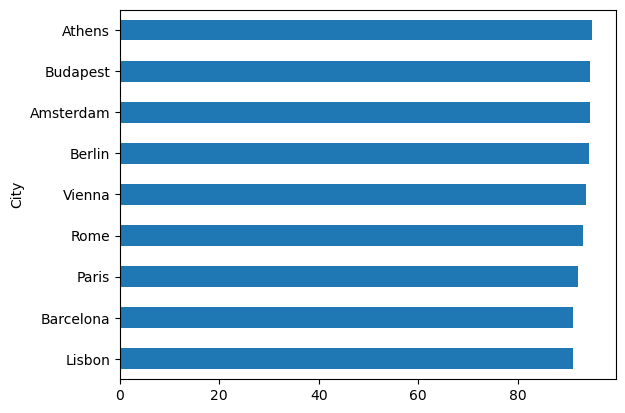

In [14]:
df.groupby('Multiple Rooms')['Price'].mean()

df.groupby('Superhost')['Price'].mean()

df.groupby('Day')['Price'].mean()

df.groupby('Superhost')['Guest Satisfaction'].mean()

df.groupby('City')['Guest Satisfaction'].mean().sort_values().plot(kind='barh')

df.groupby('Room Type')['Guest Satisfaction'].mean()